# Install Requirements

In [95]:
%pip install pandas matplotlib


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [96]:
import pandas as pd

# Load Data

In [97]:
from pathlib import Path

REPOSITORY_PATH = Path().absolute().parent
DATA_DIR = REPOSITORY_PATH / Path("data")

assert DATA_DIR.is_dir()

## Load Sources DB

In [98]:
BRONNEN_DB_DIR = DATA_DIR / Path(
    "ffdb4d71-abb2-44a1-a0b0-f0544d8dacdc_Export-fce68157-ea1d-4e93-b29d-ea26fb67c0fa"
)
assert BRONNEN_DB_DIR.is_dir()

BRONNEN_FILE = BRONNEN_DB_DIR / Path(
    "Bronnen DB ebb1bca364c64cfebc8109b4fc3951eb_all.csv"
)
assert BRONNEN_FILE.is_file()

In [224]:
sources = pd.read_csv(
    BRONNEN_FILE, keep_default_na=True, dtype={"uBlocked trackers": "Int64"}
)
sources.head()

,Name,URL Domein,Onderwerpen,Sector,Reclame,uBlocked trackers,Commercialiteit,Conclusie over doel vd bron,Vrije labels bron/onderwerp,Thumbs up 8-14?,...,Extra URL,Created time,Created by,URL Moederbedrijf,SlimZ Resultaten DB,Resultaten: toegankelijkheid,Cookie info page,More examples,Toegankelijkheidspagina,Related to Resultaten DB 01 (1) (Bronnen DB)
0,24baby.nl,https://www.24baby.nl/,NaN,Winkels en bedrijven div,over_the_top_ads,5,commercieel,"commercieel informatieproduct, reclamevehikel","nieuws, promotioneel, reclamevehikel, webshop,...",Just-in-case,...,NaN,"November 6, 2023 11:09 AM",Maarten Sprenger,NaN,NaN,"redelijk begrijpelijk,eenvoudig,redelijk begri...",https://24baby.app/privacybeleid,NaN,-,NaN
1,24kitchen.nl,https://www.24kitchen.nl,NaN,Entertainment-industrie,"company_promotion, limited_ads, sluikreclame",17,commercieel,"commercieel informatieproduct, entertainment","entertainment, infotainment, promotioneel",Just-in-case,...,NaN,"December 14, 2023 6:43 PM",Maarten Sprenger,https://privacy.thewaltdisneycompany.com/nl/de...,NaN,redelijk begrijpelijk,https://privacy.thewaltdisneycompany.com/nl/pr...,NaN,-,NaN
2,http://333travel.nl/,https://www.333travel.nl/,NaN,Reisorganisaties,company_promotion,7,commercieel,"informatie in kader van verkoop/bezoek, websh...","bedrijfsinfo/uithangbord, productinformatie, p...",Just-in-case,...,NaN,"February 23, 2024 5:35 PM",Maarten Sprenger,NaN,NaN,nvt,https://www.333travel.nl/cookies,NaN,NaN,NaN
3,absolutefacts.nl,https://www.absolutefacts.nl/,geschiedenis,Internetbedrijven,company_promotion,2,educatief_commercieel,commercieel informatieproduct,"informatie_primair_doel, webshop",Twijfel,...,NaN,"December 14, 2023 7:29 PM",Maarten Sprenger,https://www.absolutefigures.nl/,NaN,redelijk begrijpelijk,https://www.absolutefacts.nl/uw-privacy.htm,NaN,-,NaN
4,http://accuautoshop.nl/,https://www.accuautoshop.nl/,NaN,Winkels en bedrijven div,company_promotion,6,commercieel,webshop/winkel (+productinfo),webshop,Nee,...,NaN,"February 22, 2024 3:23 PM",Maarten Sprenger,NaN,NaN,"nvt,nvt",NaN,NaN,NaN,NaN


## Load Query DB

In [100]:
QUERY_DIR = DATA_DIR / Path(
    "b1e0c36a-e9d4-49b1-8b6b-2363200e535b_Export-6745f4f4-da35-4e86-9305-61aebe65f565/Query DB 01 5a4aec0449af4acc87a45c19be574353"
)
assert QUERY_DIR.is_dir()

QUERY_FILE = QUERY_DIR / Path("Untitled cacf3a0313a84561bac9b6ea48ecc189_all.csv")
assert QUERY_FILE.is_file()

In [101]:
all_queries = pd.read_csv(QUERY_FILE)

queries = (
    all_queries[all_queries["OK-100"] == "Yes"]
    .drop(["Created time"], axis=1)
    .astype({"Query": pd.StringDtype()})
)
queries.head()

,Query,Onderwerp,Soort Query (select),Leeftijd,Extra (multi),Kennisvenster?,'Samenvatting'?,Extra (top-down),Google,Video Facet,Videos-Schooltv?,Opmerkingen,OK-100,Add Results,Resultaten DB,Date,Bronnen DB,Ranking Conclusie
0,leven,Natuur/Biologie,Named entity,8,Media(ster),Nee,Nee,"Gerelateerde zoekopdrachten (na 10), Meer om t...",https://www.google.com/search?q=leven&rlz=1C5C...,https://www.google.com/search?sca_esv=60037616...,-,NaN,Yes,Done,NaN,NaN,NaN,NaN
1,wat betekent schotse,Taal/Cultuur,Vragen,10,NaN,Nee,Ja,Vragen van anderen (top),https://www.google.com/search?q=wat+betekent+s...,https://www.google.com/search?sca_esv=60037616...,-,NaN,Yes,Done,Schotse - 2 definities - Encyclo (https://www....,NaN,NaN,NaN
2,middellandse zee,Aardrijkskunde,Named entity,11,NaN,Ja uitgebreid,Nee,"Afbeeldingen carroussel (top), Gerelateerde zo...",https://www.google.com/search?q=middellandse+z...,https://www.google.com/search?sca_esv=60037616...,-,NaN,Yes,Done,NaN,NaN,NaN,NaN
3,De smurfen,Taal/Cultuur,Named entity,10,Merk/Bedrijf,Ja,Nee,"Gerelateerde zoekopdrachten (na 10), Meer om t...",https://www.google.nl/search?q=De+smurfen&sca_...,https://www.google.nl/search?sca_esv=578451392...,-,NaN,Yes,Done,NaN,NaN,google.nl/com (https://www.notion.so/google-nl...,NaN
4,keurmerk max,Maatschappij,2 of meer woorden,7,NaN,Nee,Nee,"Gerelateerde zoekopdrachten (na 10), Meer om t...",https://www.google.com/search?q=keurmerk+max&r...,https://www.google.com/search?sca_esv=60037616...,-,NaN,Yes,Done,NaN,NaN,NaN,NaN


In [102]:
len(queries)

100

## Load Results DB

In [103]:
RESULTS_DIR = DATA_DIR / Path(
    "070a93fa-8d4f-45c9-a3fd-c29d93cad3bc_Export-15b240fd-755e-4641-a877-af8349d5274c"
)
assert RESULTS_DIR.is_dir()

RESULTS_FILE = RESULTS_DIR / Path(
    "Resultaten DB 01 a7ef3ccdfad447148261278e6ca29856_all.csv"
)
assert RESULTS_FILE.is_file()

In [104]:
results = (
    pd.read_csv(RESULTS_FILE)
    .drop(["Created time"], axis=1)
    .rename(columns=lambda x: x.strip())
    .astype({"Query": pd.StringDtype(), "Ranking": "Int64"})
)
results.head()

,Titel resultaat,Link/resultaat,Bron: Thumbs up?,Query,Ranking,Bronnen DB,Bron: Inst/Bedrijf,Toegankelijkheid doelgroep (indruk),Relevant?,vrije tags page,...,Opmerking,OnderzoekNr,Bron: Commerciality,Created by,Bron-Status,Bron: Vrije labels,Bron: Sector,Ranking vrije labels,Bron: doel,Related to Bronnen DB test (Resultaten DB)
0,Hoeveel contant geld mag ik thuis bewaren? | R...,https://www.rijksoverheid.nl/onderwerpen/geldz...,Ja,geld (https://www.notion.so/geld-03503decdc9c4...,9,rijksoverheid.nl (https://www.notion.so/rijkso...,Rijksoverheid,redelijk begrijpelijk,relevant,NaN,...,NaN,1,not_for_profit,Maarten Sprenger,Done,"informatie_primair_doel,meertalig,overheidsinf...",Overheid (of i.o.v.),NaN,"overheidsinformatie (overige),overheidsinforma...",NaN
1,Het Nibud (Nationaal Instituut voor Budgetvoor...,https://www.nibud.nl/,Ja,geld (https://www.notion.so/geld-03503decdc9c4...,8,nibud.nl (https://www.notion.so/nibud-nl-624f2...,Nibud (Nationaal Instituut voor Budgetvoorlich...,redelijk begrijpelijk,relevant,NaN,...,NaN,1,not_for_profit,Maarten Sprenger,Done,"kennisbank/centrum,voorlichting",Onafhankelijk Kennis- en adviescentrum,NaN,kennisbank/centrum +,NaN
2,Geld | RTL Nieuws,https://www.rtlnieuws.nl/tags/onderwerpen/econ...,Just-in-case,geld (https://www.notion.so/geld-03503decdc9c4...,7,rtlnieuws.nl (https://www.notion.so/rtlnieuws-...,RTL Nederland B.V.,nvt,relevant,NaN,...,NaN,1,commercieel,Maarten Sprenger,Done,"infinite_scroll,journalistiek,nieuws",Div commerciële uitgevers,NaN,"journalistiek informatieproduct,link-vehikel,r...",NaN
3,Geld | AD.nl,https://www.ad.nl/geld/?referrer=https%3A%2F%2...,Just-in-case,geld (https://www.notion.so/geld-03503decdc9c4...,6,ad.nl (https://www.notion.so/ad-nl-800ddede7f5...,"AD, DPG Media Group",nvt,relevant,NaN,...,NaN,1,commercieel,Maarten Sprenger,Done,"journalistiek,nieuws,paywall (geheel/gedeeltel...",Uitgevers (journalistiek),NaN,journalistiek informatieproduct (betaald)),NaN
4,Geld | Het laatste nieuws uit Nederland lees j...,https://www.telegraaf.nl/financieel/geld,Just-in-case,geld (https://www.notion.so/geld-03503decdc9c4...,5,telegraaf.nl (https://www.notion.so/telegraaf-...,"De Telegraaf, Mediahuis Nederland B.V.",nvt,relevant,NaN,...,NaN,1,commercieel,Maarten Sprenger,Done,"journalistiek,nieuws,paywall (geheel/gedeeltel...",Div commerciële uitgevers,NaN,journalistiek informatieproduct (betaald)),NaN


In [105]:
COLUMNS_WITH_LINK = ["Query", "Bronnen DB"]
assert all(column in results.columns for column in COLUMNS_WITH_LINK)

for column in COLUMNS_WITH_LINK:
    results[column] = (results[column].str.split(" \(").str[0]).astype(pd.StringDtype())
results.head()

,Titel resultaat,Link/resultaat,Bron: Thumbs up?,Query,Ranking,Bronnen DB,Bron: Inst/Bedrijf,Toegankelijkheid doelgroep (indruk),Relevant?,vrije tags page,...,Opmerking,OnderzoekNr,Bron: Commerciality,Created by,Bron-Status,Bron: Vrije labels,Bron: Sector,Ranking vrije labels,Bron: doel,Related to Bronnen DB test (Resultaten DB)
0,Hoeveel contant geld mag ik thuis bewaren? | R...,https://www.rijksoverheid.nl/onderwerpen/geldz...,Ja,geld,9,rijksoverheid.nl,Rijksoverheid,redelijk begrijpelijk,relevant,NaN,...,NaN,1,not_for_profit,Maarten Sprenger,Done,"informatie_primair_doel,meertalig,overheidsinf...",Overheid (of i.o.v.),NaN,"overheidsinformatie (overige),overheidsinforma...",NaN
1,Het Nibud (Nationaal Instituut voor Budgetvoor...,https://www.nibud.nl/,Ja,geld,8,nibud.nl,Nibud (Nationaal Instituut voor Budgetvoorlich...,redelijk begrijpelijk,relevant,NaN,...,NaN,1,not_for_profit,Maarten Sprenger,Done,"kennisbank/centrum,voorlichting",Onafhankelijk Kennis- en adviescentrum,NaN,kennisbank/centrum +,NaN
2,Geld | RTL Nieuws,https://www.rtlnieuws.nl/tags/onderwerpen/econ...,Just-in-case,geld,7,rtlnieuws.nl,RTL Nederland B.V.,nvt,relevant,NaN,...,NaN,1,commercieel,Maarten Sprenger,Done,"infinite_scroll,journalistiek,nieuws",Div commerciële uitgevers,NaN,"journalistiek informatieproduct,link-vehikel,r...",NaN
3,Geld | AD.nl,https://www.ad.nl/geld/?referrer=https%3A%2F%2...,Just-in-case,geld,6,ad.nl,"AD, DPG Media Group",nvt,relevant,NaN,...,NaN,1,commercieel,Maarten Sprenger,Done,"journalistiek,nieuws,paywall (geheel/gedeeltel...",Uitgevers (journalistiek),NaN,journalistiek informatieproduct (betaald)),NaN
4,Geld | Het laatste nieuws uit Nederland lees j...,https://www.telegraaf.nl/financieel/geld,Just-in-case,geld,5,telegraaf.nl,"De Telegraaf, Mediahuis Nederland B.V.",nvt,relevant,NaN,...,NaN,1,commercieel,Maarten Sprenger,Done,"journalistiek,nieuws,paywall (geheel/gedeeltel...",Div commerciële uitgevers,NaN,journalistiek informatieproduct (betaald)),NaN


## Match Sources and Queries

In [106]:
query = queries["Query"].sample(n=1).iloc[0]
query

'belangrijkste piramide'

In [107]:
results.loc[results["Query"].str.startswith(query)].sort_values(by="Ranking")

,Titel resultaat,Link/resultaat,Bron: Thumbs up?,Query,Ranking,Bronnen DB,Bron: Inst/Bedrijf,Toegankelijkheid doelgroep (indruk),Relevant?,vrije tags page,...,Opmerking,OnderzoekNr,Bron: Commerciality,Created by,Bron-Status,Bron: Vrije labels,Bron: Sector,Ranking vrije labels,Bron: doel,Related to Bronnen DB test (Resultaten DB)
674,Egyptische piramide - Wikipedia,https://nl.wikipedia.org/wiki/Egyptische_piram...,Ja,belangrijkste piramide,1,wikipedia.org,Wikimedia Foundation inc,complex,relevant,NaN,...,NaN,1,not_for_profit,Maarten Sprenger,Done,"community,informatie_primair_doel,user_generat...",NGO/Goede doelen site,NaN,gebruikersplatform met kwaliteitsinformatie,NaN
673,Piramiden van Gizeh - Wikipedia,https://nl.wikipedia.org/wiki/Piramiden_van_Gizeh,Ja,belangrijkste piramide,2,wikipedia.org,Wikimedia Foundation inc,complex,relevant,NaN,...,NaN,1,not_for_profit,Maarten Sprenger,Done,"community,informatie_primair_doel,user_generat...",NGO/Goede doelen site,NaN,gebruikersplatform met kwaliteitsinformatie,NaN
672,Piramide - Wikikids,https://www.wikikids.nl/Piramide,Nee,belangrijkste piramide,3,wikikids.nl,"Stichting Wikikids, ondersteund door Kennisnet...",redelijk begrijpelijk,relevant,NaN,...,NaN,1,not_for_profit,Maarten Sprenger,Done,"community,informatie_primair_doel,user_generat...",Amateur/vrijwilligersverenigingen,NaN,gebruikersplatform zonder kwaliteitsgarantie,NaN
671,De mooiste piramides van Egypte - Corendon,https://www.corendon.nl/inspiratie/mooiste-pir...,Nee,belangrijkste piramide,4,corendon.nl,Corendon,nvt,relevant,NaN,...,corendon.nl (https://www.notion.so/corendon-nl...,1,commercieel,Maarten Sprenger,Done,"bedrijfsinfo/uithangbord,productinformatie,web...",Reisorganisaties,NaN,"product/bedrijfsinfo,webshop/winkel (+producti...",NaN
670,"Piramides van Gizeh bezoeken: Cheops, Chefren ...",https://www.euroreizen.be/landen/egypte/gizeh-...,Nee,belangrijkste piramide,5,euroreizen.be,The Media Bay en Holidayline nv,nvt,relevant,NaN,...,NaN,1,commercieel,Maarten Sprenger,Done,"bedrijfsinfo/uithangbord,productinformatie,web...",Reisorganisaties,NaN,"product/bedrijfsinfo,webshop/winkel (+producti...",NaN
669,Piramide van Cheops | Dit moet je weten - http...,https://www.reis-expert.nl/afrika/egypte/bezie...,Nee,belangrijkste piramide,6,reis-expert.nl,Reis-expert - Sjoerd en Ties,nvt,relevant,NaN,...,NaN,1,commercieel,Maarten Sprenger,Needs peer-review,"bedrijfsinfo/uithangbord,promotioneel,webshop",Reisorganisaties,NaN,informatie in kader van verkoop/bezoek,NaN
668,255 wonderlijke piramides in de woestijn van S...,https://www.hunebednieuwscafe.nl/2019/12/wonde...,Ja,belangrijkste piramide,7,hunebednieuwscafe.nl,Stichting Hunebedcentrum,complex,relevant,NaN,...,NaN,1,"ANBI,not_for_profit",Maarten Sprenger,Done,"kennisbank/centrum,promotioneel",Musea en archieven,NaN,non-commercieel informatieproduct,NaN
667,De piramides van Gizeh | Alles over de ‘must s...,https://www.333travel.nl/blog/piramides-van-gi...,Just-in-case,belangrijkste piramide,8,333travel.nl,333travel,nvt,relevant,NaN,...,NaN,1,commercieel,Maarten Sprenger,Done,"bedrijfsinfo/uithangbord,productinformatie,pro...",Reisorganisaties,NaN,"informatie in kader van verkoop/bezoek,websho...",NaN
666,"Egypte piramides, Giza, Cheops, Sakkara, Djose...",http://www.info-egypte.nl/piramides/,Nee,belangrijkste piramide,9,info-egypte.nl,Info-Egypte.nl,complex,relevant,NaN,...,NaN,1,commercieel,Maarten Sprenger,Almost completed,"about-voorbeeld,datum-voorbeeld,http,oud/verou...",Individuele personen div,NaN,"outdated,reclamevehikel",NaN
665,belangrijkste piramide - Google Zoeken Afbeeld...,https://www.google.nl/search?sca_esv=590892788...,Just-in-case,belangrijkste piramide,10,google.nl/com,Aphabet,nvt,relevant,zoekmachine facet link,...,NaN,1,ultra_commercieel,Maarten Sprenger,Almost completed,"BigTech,zoekmachines",Internetbedrijven,NaN,commercieel informatieproduct,NaN


# Analysis

## Results

### Vrije Labels

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '12'),
 Text(0, 0, '12'),
 Text(0, 0, '12'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '20'),
 Text(0, 0, '22'),
 Text(0, 0, '23'),
 Text(0, 0, '24'),
 Text(0, 0, '24'),
 Text(0, 0, '27'),
 Text(0, 0, '27'),
 Text(0, 0, '29'),
 Text(0, 0, '32'),
 Text(0, 0, '33'),
 Text(0, 0, '33'),
 Text(0, 0, '34'),
 Text(0, 0, '35'),
 Text(0, 0, '35'),
 Text(0, 0, '38'),
 Text(0, 0, '44'),
 Text(0, 0, '47'),
 Text(0, 0, '53'),
 Text(0, 0, '64'),
 Text(0, 0, '78'),
 Text(0, 0, '78'),
 Text(0, 0, '82'),
 Text(0, 0, '87'),
 Text(0, 0, '101'),
 Text(0, 0, '136'),
 Text(0, 0, '136'),
 Text(0, 0, '136'),
 Text(0

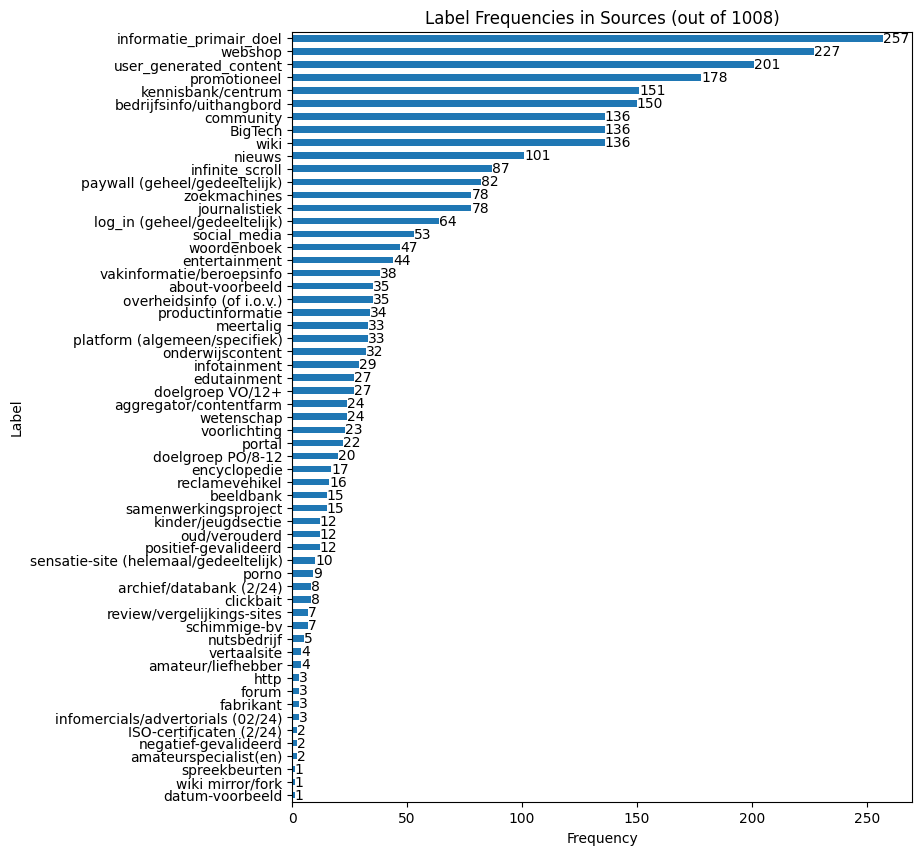

In [191]:
ax = (
    results["Bron: Vrije labels"]
    .str.split(",")
    .explode()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Label Frequencies in Sources (out of {len(results)})",
        xlabel="Frequency",
        ylabel="Label",
        figsize=(8, 10),
    )
)

ax.bar_label(ax.containers[0])

### Result Sources

[Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0

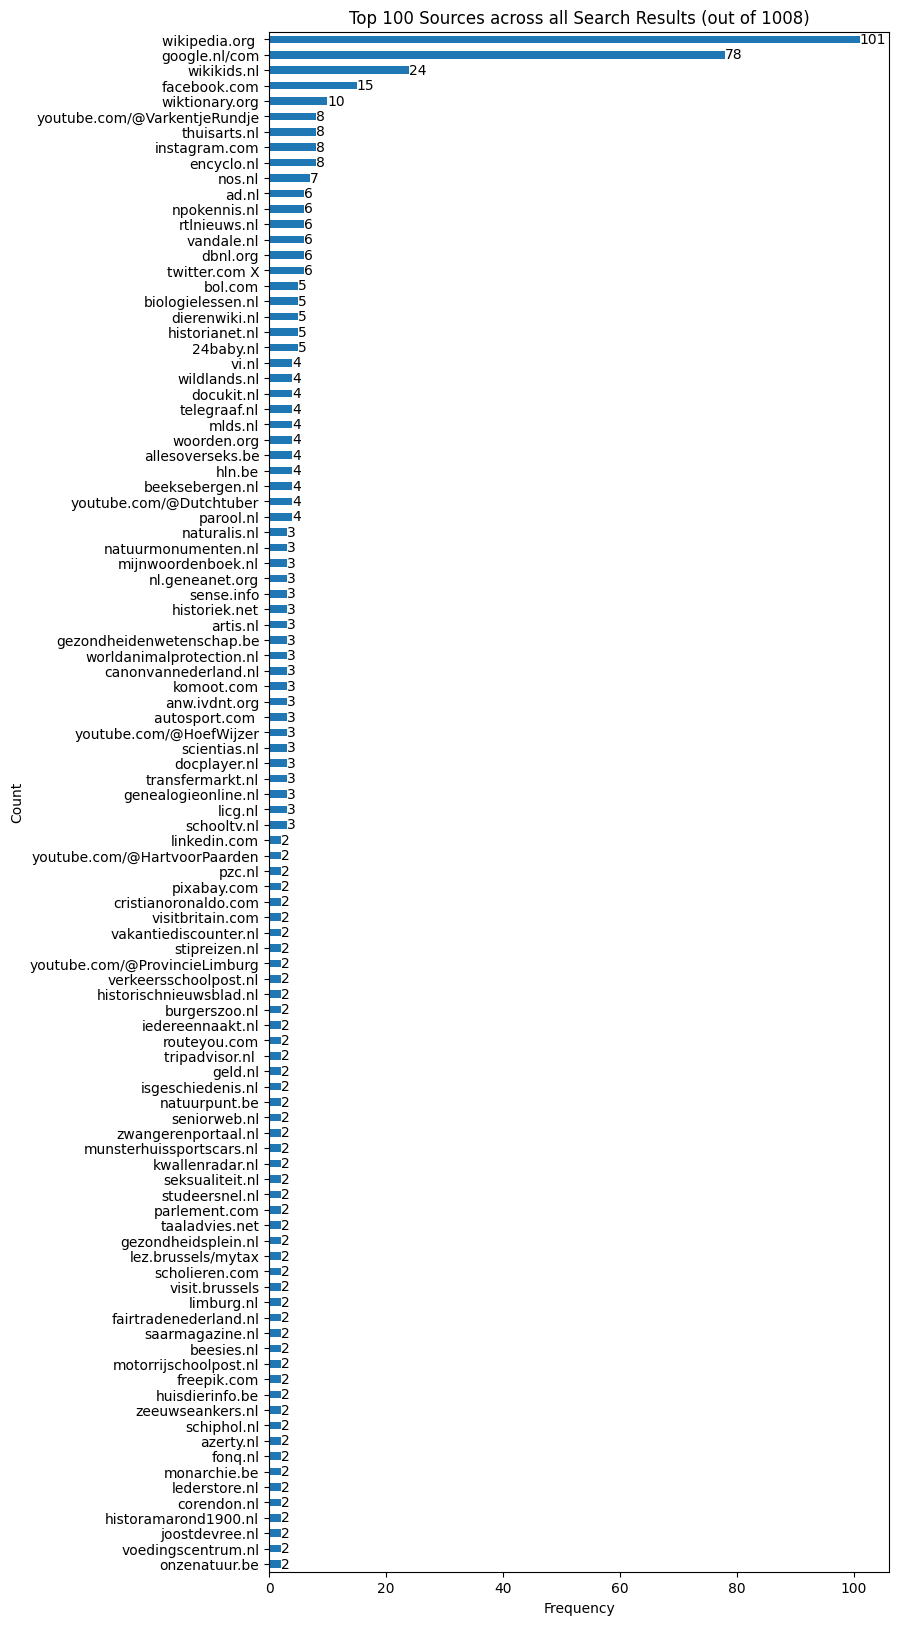

In [192]:
n = 100

ax = (
    results["Bronnen DB"]
    .value_counts()
    .filter(regex="^[^*]")[:n]  # Filter out groups (marked with *)
    .sort_values(ascending=True)
    .plot(
        kind="barh",
        figsize=(8, n // 5),
        title=f"Top {n} Sources across all Search Results (out of {len(results)})",
        xlabel="Frequency",
        ylabel="Count",
    )
)

ax.bar_label(ax.containers[0])

### Result Types

[Text(0, 0, '142'), Text(0, 0, '169'), Text(0, 0, '697')]

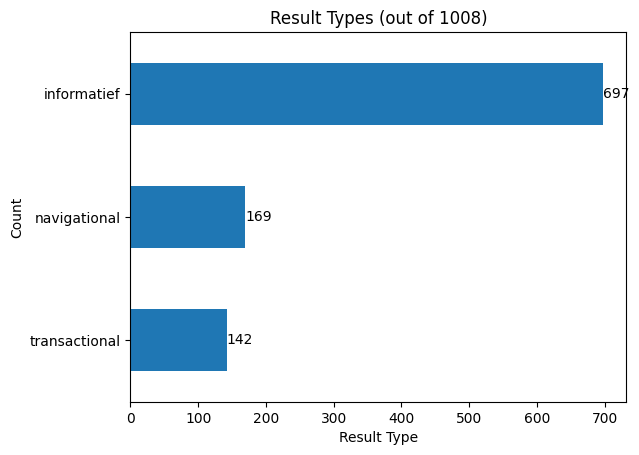

In [194]:
ax = (
    results["Soort Resultaat"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Result Types (out of {len(results)})",
        xlabel="Result Type",
        ylabel="Count",
    )
)
ax.bar_label(ax.containers[0])

### Result Relevance

[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '12'),
 Text(0, 0, '122'),
 Text(0, 0, '841')]

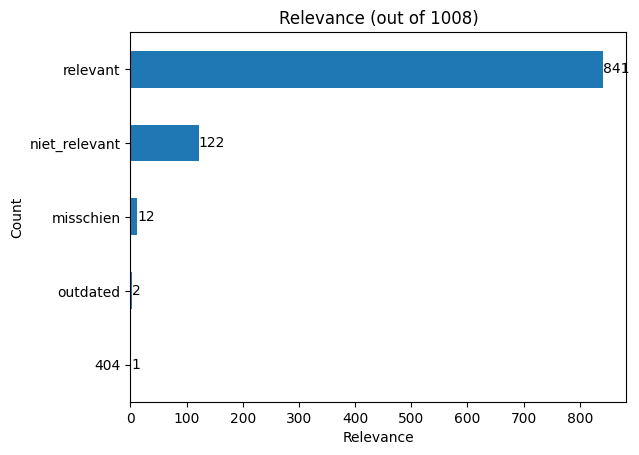

In [195]:
ax = (
    results["Relevant?"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Relevance (out of {len(results)})",
        xlabel="Relevance",
        ylabel="Count",
    )
)
ax.bar_label(ax.containers[0])

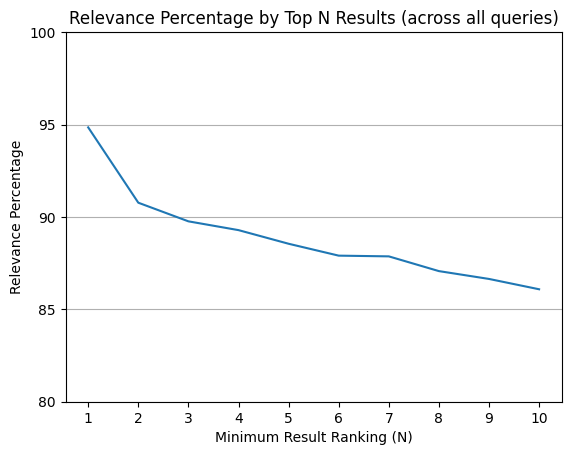

In [196]:
relevant: dict[int, float] = {}

for n in range(1, 11):
    _results = results.loc[results["Ranking"] <= n]
    relevant[n] = _results["Relevant?"].value_counts(normalize=True)["relevant"] * 100

pd.DataFrame(relevant.items(), columns=["Ranking", "Relevance"]).set_index(
    "Ranking"
).plot(
    title="Relevance Percentage by Top N Results (across all queries)",
    xlabel="Minimum Result Ranking (N)",
    ylabel="Relevance Percentage",
    xticks=range(1, 11),
    yticks=range(80, 105, 5),
    legend=False,
).grid(axis="y")

### Result Accessibility

[Text(0, 0, '1'),
 Text(0, 0, '8'),
 Text(0, 0, '10'),
 Text(0, 0, '63'),
 Text(0, 0, '294'),
 Text(0, 0, '300'),
 Text(0, 0, '332')]

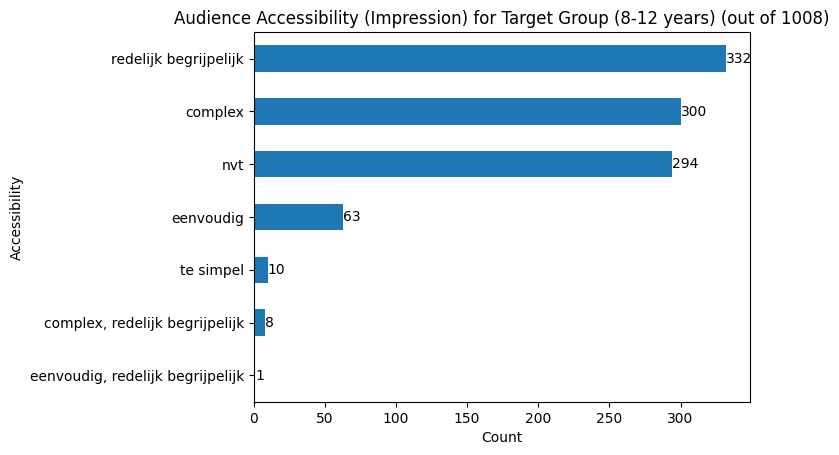

In [198]:
ax = (
    results["Toegankelijkheid doelgroep (indruk)"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Audience Accessibility (Impression) for Target Group (8-12 years) (out of {len(results)})",
        xlabel="Count",
        ylabel="Accessibility",
    )
)
ax.bar_label(ax.containers[0])

{1: Toegankelijkheid doelgroep (indruk)
complex                  0.48
nvt                      0.25
redelijk begrijpelijk    0.23
te simpel                0.02
eenvoudig                0.02
Name: proportion, dtype: float64, 2: Toegankelijkheid doelgroep (indruk)
complex                           0.422886
redelijk begrijpelijk             0.268657
nvt                               0.248756
eenvoudig                         0.044776
te simpel                         0.009950
complex, redelijk begrijpelijk    0.004975
Name: proportion, dtype: float64, 3: Toegankelijkheid doelgroep (indruk)
complex                           0.384106
redelijk begrijpelijk             0.278146
nvt                               0.271523
eenvoudig                         0.049669
te simpel                         0.009934
complex, redelijk begrijpelijk    0.006623
Name: proportion, dtype: float64, 4: Toegankelijkheid doelgroep (indruk)
complex                           0.346535
redelijk begrijpelijk           

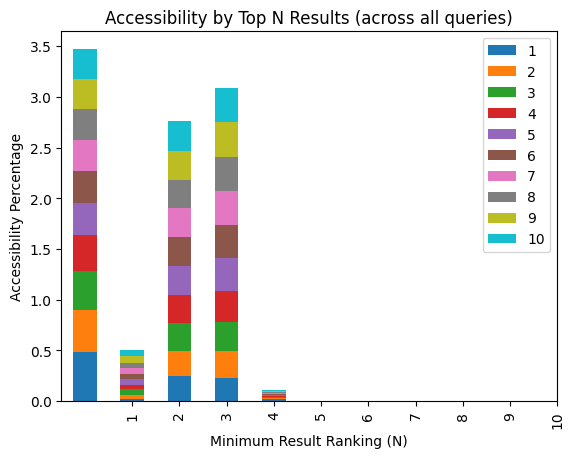

In [190]:
# TODO: toegankelijkheid doelgroep (indruk) per ranking

accessible = {}
for n in range(1, 11):
    _results = results.loc[results["Ranking"] <= n]
    accessible[n] = _results["Toegankelijkheid doelgroep (indruk)"].value_counts(
        normalize=True
    )

print(accessible)

# , columns=["Ranking", "redelijk begrijpelijk"])#.set_index("Ranking")
categories = ["redelijk begrijpelijk", "complex", "eenvoudig", "te simpel"]
pd.DataFrame(accessible).dropna().plot(
    title="Accessibility by Top N Results (across all queries)",
    kind="bar",
    stacked=True,
    xlabel="Minimum Result Ranking (N)",
    ylabel="Accessibility Percentage",
    xticks=range(1, 11),
    # yticks=range(80, 105, 5),
    legend=True,
)
ax.grid(axis="y")
for container in ax.containers:
    ax.bar_label(container, label_type="center")

## Sources

### Commerciality

[Text(0, 0, '1'),
 Text(0, 0, '4'),
 Text(0, 0, '13'),
 Text(0, 0, '24'),
 Text(0, 0, '36'),
 Text(0, 0, '42'),
 Text(0, 0, '48'),
 Text(0, 0, '202'),
 Text(0, 0, '272')]

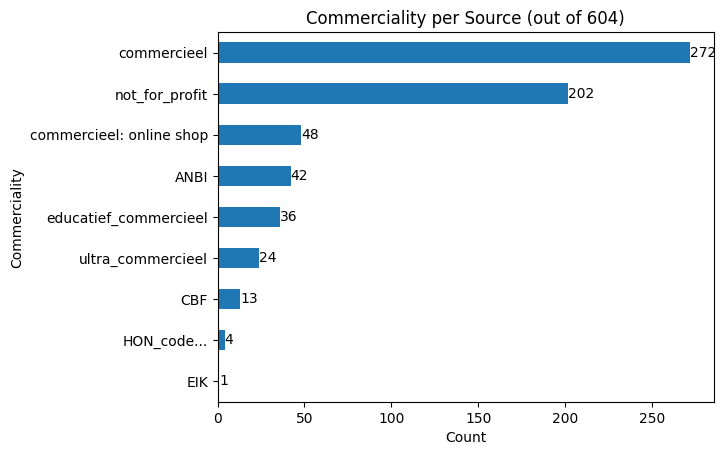

In [200]:
ax = (
    sources["Commercialiteit"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Commerciality per Source (out of {len(sources)})",
        xlabel="Count",
        ylabel="Commerciality",
    )
)
ax.bar_label(ax.containers[0])

### Sectors

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '10'),
 Text(0, 0, '13'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '21'),
 Text(0, 0, '21'),
 Text(0, 0, '23'),
 Text(0, 0, '33'),
 Text(0, 0, '38'),
 Text(0, 0, '55'),
 Text(0, 0, '87'),
 Text(0, 0, '146')]

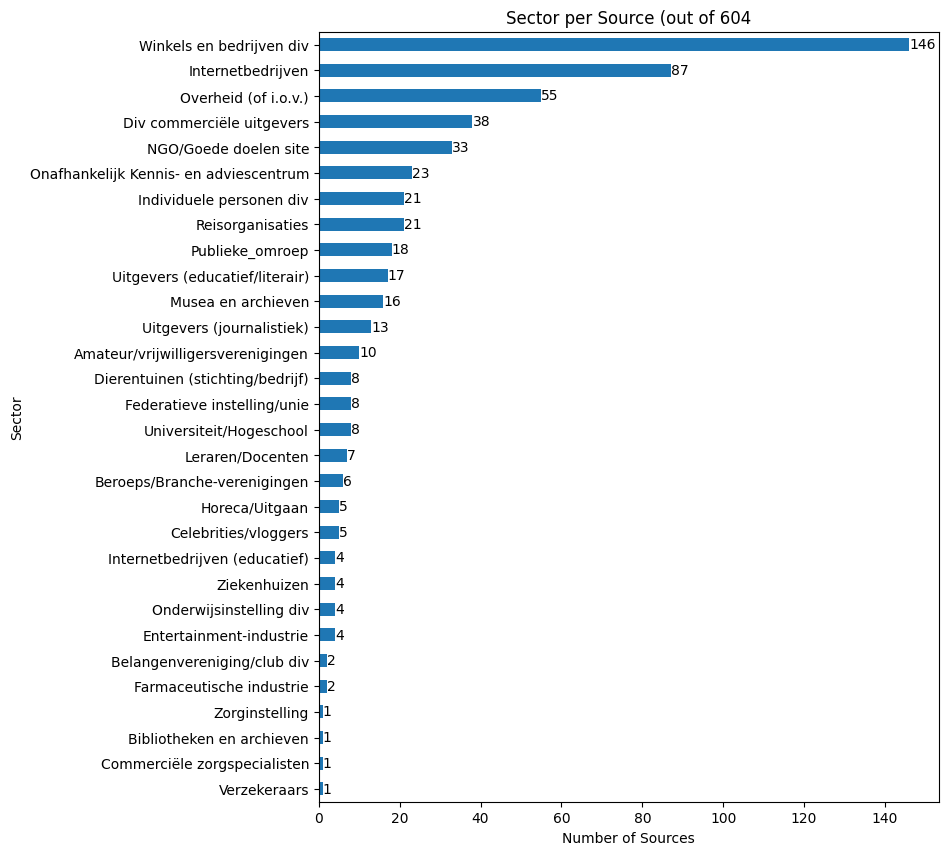

In [201]:
ax = (
    sources["Sector"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Sector per Source (out of {len(sources)}",
        xlabel="Number of Sources",
        ylabel="Sector",
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

### Free Labels

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '11'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '12'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '18'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '20'),
 Text(0, 0, '25'),
 Text(0, 0, '27'),
 Text(0, 0, '29'),
 Text(0, 0, '31'),
 Text(0, 0, '31'),
 Text(0, 0, '33'),
 Text(0, 0, '41'),
 Text(0, 0, '43')

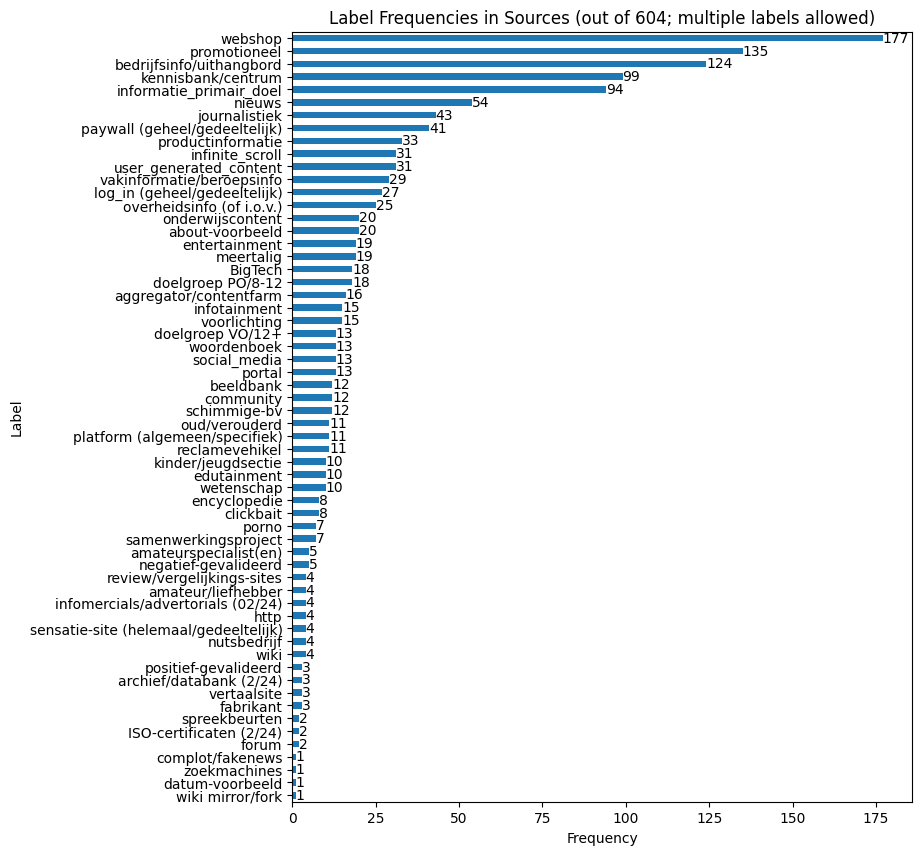

In [129]:
ax = (
    sources["Vrije labels bron/onderwerp"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Label Frequencies in Sources (out of {len(sources)}; multiple labels allowed)",
        xlabel="Frequency",
        ylabel="Label",
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

### Trackers

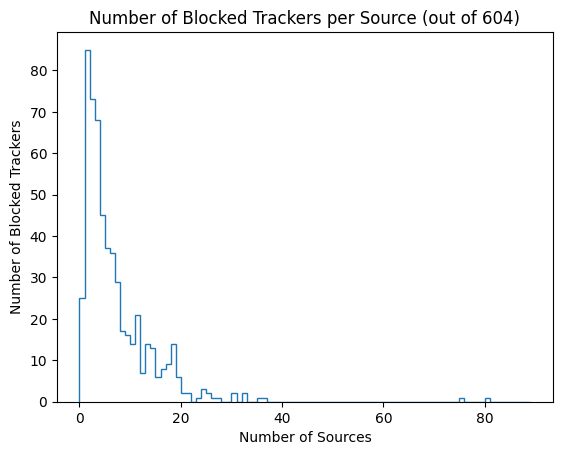

In [325]:
sources["uBlocked trackers"].plot(
    kind="hist",
    histtype="step",
    bins=range(0, 90),
    # xticks=range(0, 90, 5),
    title=f"Number of Blocked Trackers per Source (out of {len(sources)})",
    ylabel="Number of Blocked Trackers",
    xlabel="Number of Sources",
)

### Ads

[Text(0, 0, '1'),
 Text(0, 0, '17'),
 Text(0, 0, '298'),
 Text(0, 0, '46'),
 Text(0, 0, '61'),
 Text(0, 0, '172'),
 Text(0, 0, '7'),
 Text(0, 0, '25'),
 Text(0, 0, '6')]

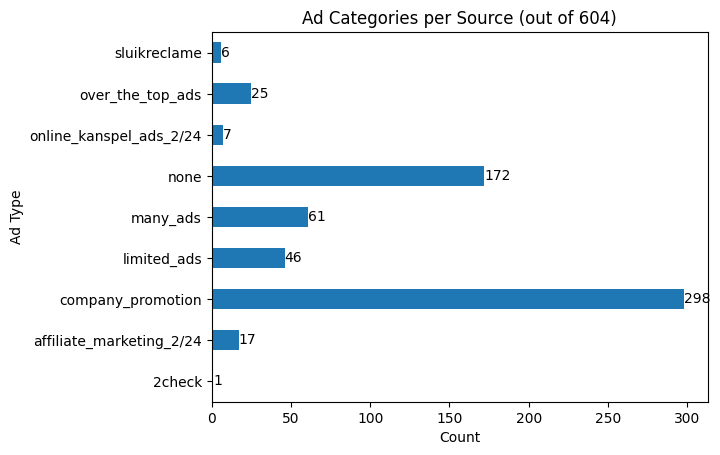

In [333]:
ax = (
    sources["Reclame"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts()
    .sort_index()
    .plot(
        kind="barh",
        title=f"Ad Categories per Source (out of {len(sources)})",
        xlabel="Count",
        ylabel="Ad Type",
    )
)
ax.bar_label(ax.containers[0])

### Goal of Source

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '9'),
 Text(0, 0, '9'),
 Text(0, 0, '12'),
 Text(0, 0, '12'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '16'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '32'),
 Text(0, 0, '42'),
 Text(0, 0, '50'),
 Text(0, 0, '55'),
 Text(0, 0, '59'),
 Text(0, 0, '82'),
 Text(0, 0, '95')]

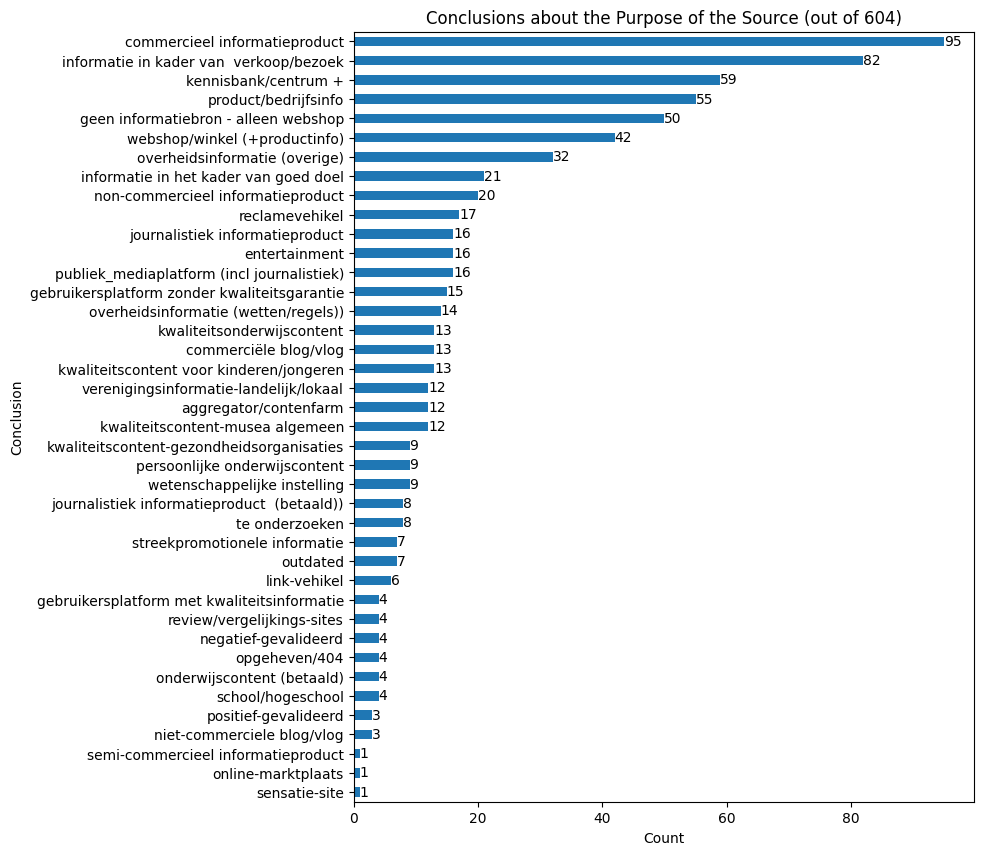

In [340]:
ax = (
    sources["Conclusie over doel vd bron"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Conclusions about the Purpose of the Source (out of {len(sources)})",
        xlabel="Count",
        ylabel="Conclusion",
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

### Source: Thumbs-Up

[Text(0, 0, '23'), Text(0, 0, '177'), Text(0, 0, '179'), Text(0, 0, '182')]

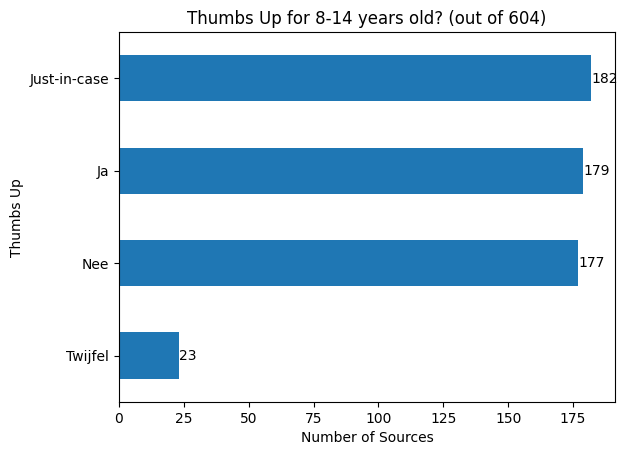

In [352]:
ax = (
    sources["Thumbs up 8-14?"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Thumbs Up for 8-14 years old? (out of {len(sources)})",
        xlabel="Number of Sources",
        ylabel="Thumbs Up",
    )
)
ax.bar_label(ax.containers[0])

### About Page

[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '13'),
 Text(0, 0, '18'),
 Text(0, 0, '49'),
 Text(0, 0, '69'),
 Text(0, 0, '204'),
 Text(0, 0, '213')]

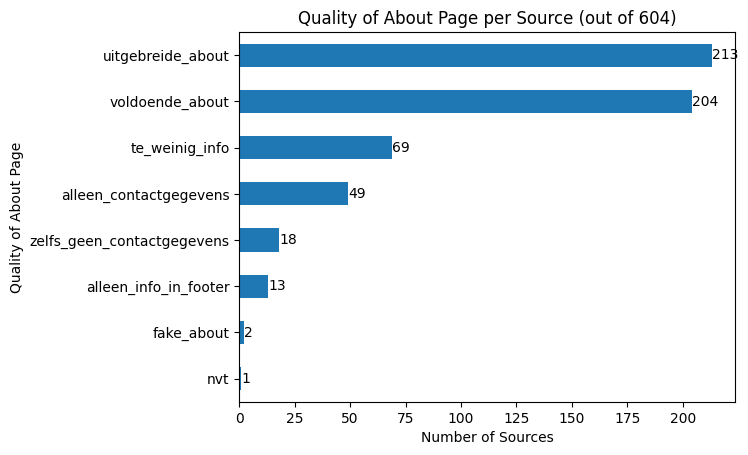

In [351]:
ax = (
    sources["Kwaliteit_about"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"Quality of About Page per Source (out of {len(sources)})",
        xlabel="Number of Sources",
        ylabel="Quality of About Page",
    )
)
ax.bar_label(ax.containers[0])

## Queries and Result Pages

### Query Length

[Text(0, 0, '46'),
 Text(0, 0, '26'),
 Text(0, 0, '12'),
 Text(0, 0, '7'),
 Text(0, 0, '2'),
 Text(0, 0, '4'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1')]

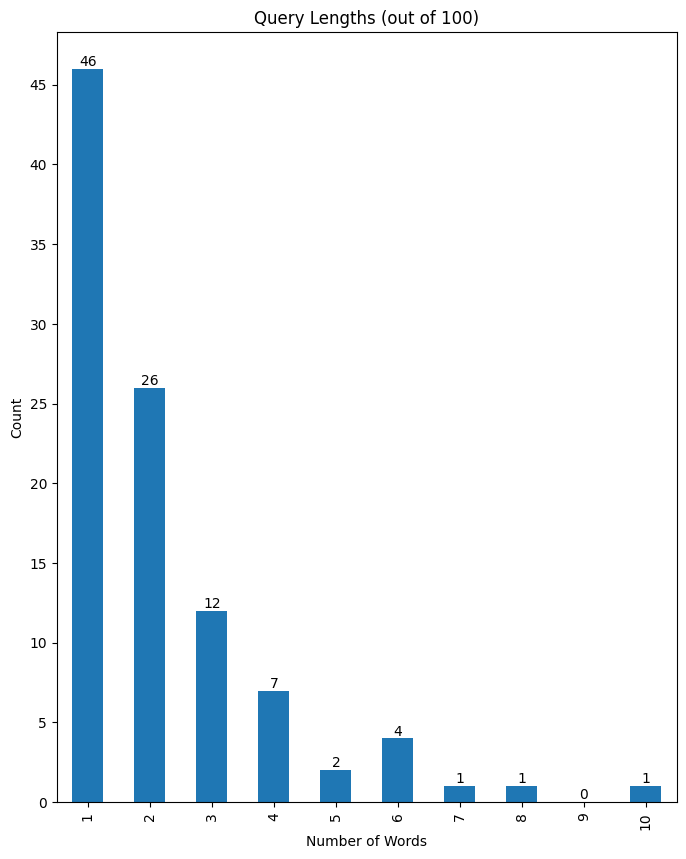

In [215]:
lengths = queries["Query"].str.split(" ").str.len().value_counts()
values = range(1, lengths.index.max() + 1)

ax = lengths.reindex(values, fill_value=0).plot(
    kind="bar",
    title=f"Query Lengths (out of {len(queries)})",
    ylabel="Count",
    xlabel="Number of Words",
    figsize=(8, 10),
    yticks=range(0, 50, 5),
)
ax.bar_label(ax.containers[0])

### Result Page Extras

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '12'),
 Text(0, 0, '15'),
 Text(0, 0, '25'),
 Text(0, 0, '29'),
 Text(0, 0, '67'),
 Text(0, 0, '85')]

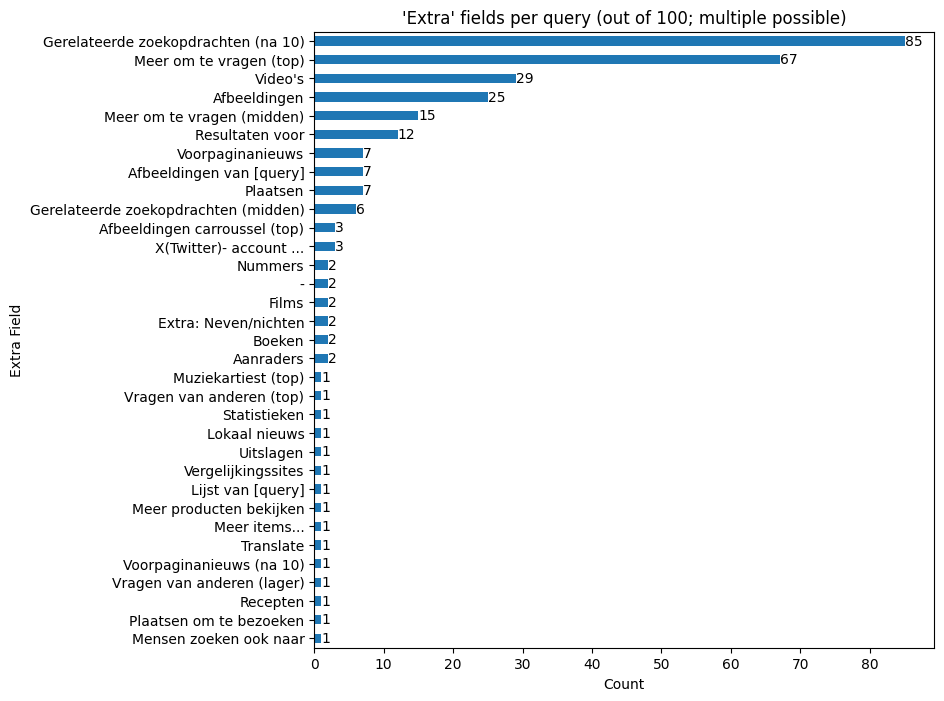

In [218]:
ax = (
    queries["Extra (top-down)"]
    .str.split(", ")
    .explode()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title=f"'Extra' fields per query (out of {len(queries)}; multiple possible)",
        figsize=(8, 8),
        xlabel="Count",
        ylabel="Extra Field",
    )
)
ax.bar_label(ax.containers[0])